In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

def analyze_activity(column_name, filter_fn, categorize_fn, sent_df, unsent_df, order_fn=None):
    # Step 1: Check if the column exists in sent dataset
    if column_name not in sent_df.columns:
        raise ValueError(f"{column_name} does not exist in the sent dataset")
    
    # Step 2: Check if the column exists in unsent dataset
    column_exists_in_unsent = column_name in unsent_df.columns

    # Step 3: Create datasets with relevant columns
    sent_filtered_df = sent_df[[column_name, 'jbsteps60', 'jbmins60']].dropna().copy()
    if column_exists_in_unsent:
        unsent_filtered_df = unsent_df[[column_name, 'jbsteps60', 'jbmins60']].dropna().copy()
    
    # Step 4: Apply the filter function only to the column_name column
    sent_filtered_df = sent_filtered_df[sent_filtered_df[column_name].apply(filter_fn)]
    if column_exists_in_unsent:
        unsent_filtered_df = unsent_filtered_df[unsent_filtered_df[column_name].apply(filter_fn)]
    
    # Step 5: Apply the categorization function only to the column_name column
    sent_filtered_df['category'] = sent_filtered_df[column_name].apply(categorize_fn)
    if column_exists_in_unsent:
        unsent_filtered_df['category'] = unsent_filtered_df[column_name].apply(categorize_fn)
    
    # Step 6: Plot the results
    categories = sent_filtered_df['category'].unique()
    if order_fn:
        categories = order_fn(categories)
    x = np.arange(len(categories))  # the label locations
    width = 0.35  # the width of the bars


    # Plot for steps (jbsteps60)
    plt.figure(figsize=(10, 6))
    
    sent_means_steps = [sent_filtered_df[sent_filtered_df['category'] == category]['jbsteps60'].mean() for category in categories]
    print(sent_means_steps, categories)

    if column_exists_in_unsent:
        unsent_means_steps = [unsent_filtered_df[unsent_filtered_df['category'] == category]['jbsteps60'].mean() for category in categories]

    plt.bar(x - width/2, sent_means_steps, width, label='Suggestion Sent', color='#FFB347')  # Light Orange
    if column_exists_in_unsent:
        plt.bar(x + width/2, unsent_means_steps, width, label='Suggestion Not Sent', color='#A8D5BA')  # Light Green

    plt.title(f'Average Steps per Category - {column_name}')
    plt.xlabel('Category')
    plt.ylabel('Average Steps (jbsteps60)')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()  # Only 2 entries in the legend now
    plt.tight_layout()
    plt.show()

    # Plot for minutes (jbmins60)
    plt.figure(figsize=(10, 6))
    
    sent_means_mins = [sent_filtered_df[sent_filtered_df['category'] == category]['jbmins60'].mean() for category in categories]
    print(sent_means_mins, categories)
    if column_exists_in_unsent:
        unsent_means_mins = [unsent_filtered_df[unsent_filtered_df['category'] == category]['jbmins60'].mean() for category in categories]

    plt.bar(x - width/2, sent_means_steps, width, label='Suggestion Sent', color='#FFB347')  # Light Orange
    if column_exists_in_unsent:
        plt.bar(x + width/2, unsent_means_steps, width, label='Suggestion Not Sent', color='#A8D5BA')  # Light Green

    plt.title(f'Average Minutes Walked per Category - {column_name}')
    plt.xlabel('Category')
    plt.ylabel('Average Minutes (jbmins60)')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()  # Only 2 entries in the legend now
    plt.tight_layout()
    plt.show()

# Example Usage:
# Define filter function and categorization function
def base_filter(value):
    return True


def base_cat(value):
    return value


In [276]:
# Load datasets
sent_df = pd.read_csv('data/modified_data/Cleaned Dataset_V2.csv')
unsent_df = pd.read_csv('data/modified_data/Cleaned Unsent Dataset_V2.csv')

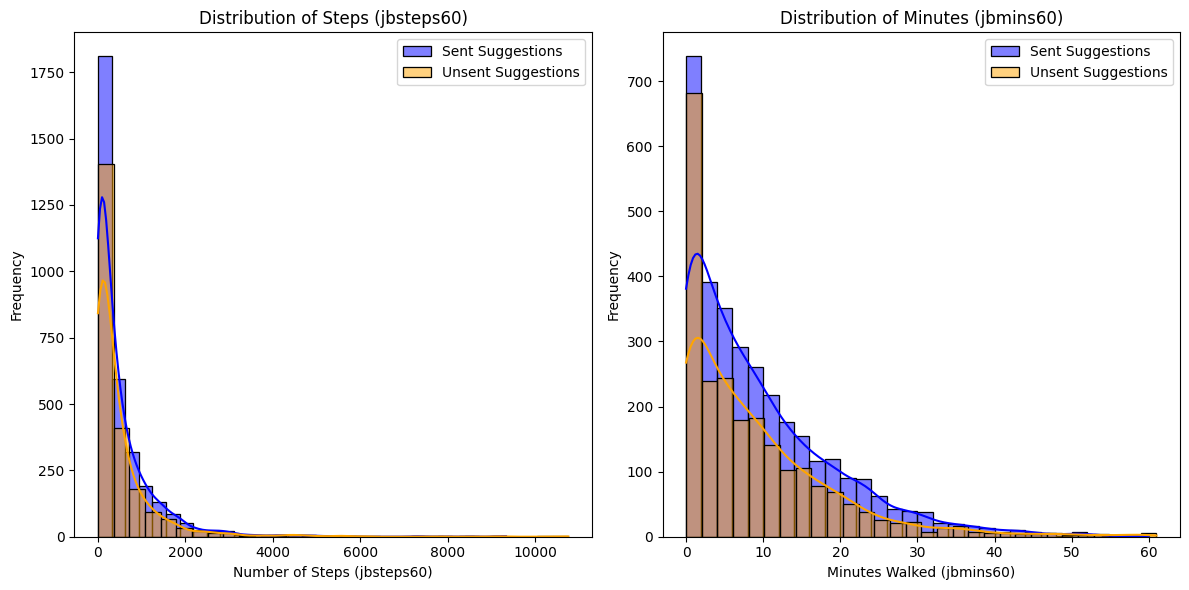

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `unsent_suggestions_df` is already loaded alongside `filtered_suggestion_df`

# Step 1: Plot the distribution of jbsteps60 for both sent and unsent suggestions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of steps (jbsteps60)
sns.histplot(sent_df['jbsteps60'], bins=30, kde=True, color='blue', ax=axes[0], label='Sent Suggestions')
sns.histplot(unsent_df['jbsteps60'], bins=30, kde=True, color='orange', ax=axes[0], label='Unsent Suggestions')
axes[0].set_title('Distribution of Steps (jbsteps60)')
axes[0].set_xlabel('Number of Steps (jbsteps60)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Step 2: Plot the distribution of jbmins60 for both sent and unsent suggestions
sns.histplot(sent_df['jbmins60'], bins=30, kde=True, color='blue', ax=axes[1], label='Sent Suggestions')
sns.histplot(unsent_df['jbmins60'], bins=30, kde=True, color='orange', ax=axes[1], label='Unsent Suggestions')
axes[1].set_title('Distribution of Minutes (jbmins60)')
axes[1].set_xlabel('Minutes Walked (jbmins60)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Weather Condition

In [277]:
column_name = "dec.weather.condition"
def weather_filter_fn(value):
    return value not in ["com.google.appengine.labs.repackaged.org.json.JSONObject.<init>(JSONObject.java:179)", "com.google.appengine.labs.repackaged.org.json.JSONObject.getJSONObject(JSONObject.java:516)"]



[np.float64(506.79223300970875), np.float64(562.1359927470535), np.float64(578.5847457627119), np.float64(485.82296650717706), np.float64(292.6666666666667), np.float64(756.9090909090909), np.float64(409.67692307692306), np.float64(309.93333333333334), np.float64(487.8235294117647), np.float64(406.9756097560976), np.float64(373.4651162790698), np.float64(0.0), np.float64(563.3333333333334), np.float64(69.0), np.float64(551.6363636363636), np.float64(0.0)] ['Partly Cloudy' 'Clear' 'Mostly Cloudy' 'Overcast' 'Thunderstorm'
 'Scattered Clouds' 'Rain' 'Light Rain' 'Fog' 'unknown' 'Snow'
 'Light Freezing Fog' 'Haze' 'Ice Pellets' 'Light Snow'
 'Light Freezing Rain']


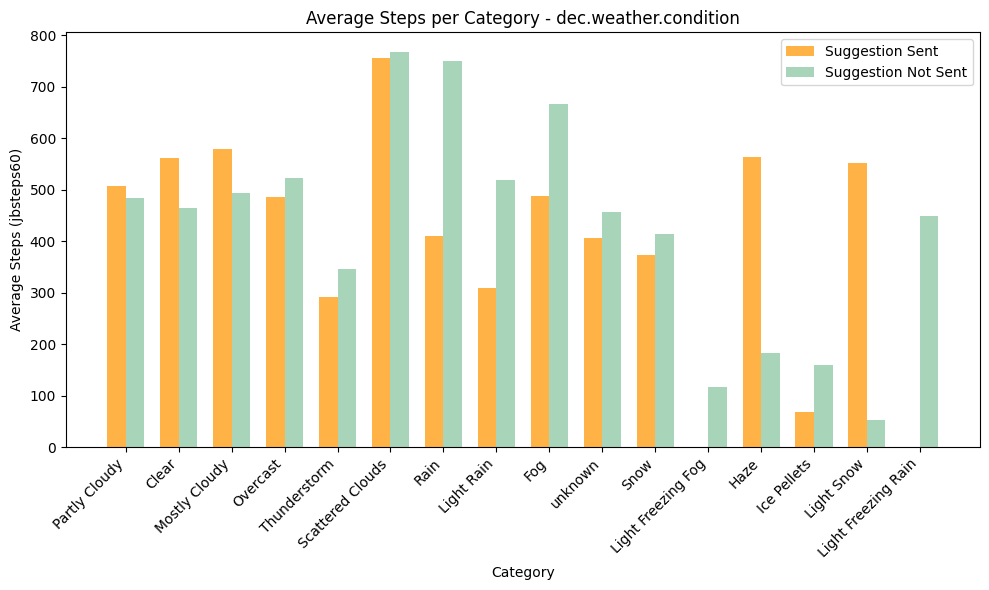

[np.float64(9.359223300970873), np.float64(9.900271985494108), np.float64(10.070621468926554), np.float64(9.075598086124401), np.float64(7.166666666666667), np.float64(9.818181818181818), np.float64(8.215384615384615), np.float64(5.866666666666666), np.float64(9.568627450980392), np.float64(8.121951219512194), np.float64(7.4186046511627906), np.float64(0.0), np.float64(7.888888888888889), np.float64(2.2), np.float64(12.454545454545455), np.float64(0.0)] ['Partly Cloudy' 'Clear' 'Mostly Cloudy' 'Overcast' 'Thunderstorm'
 'Scattered Clouds' 'Rain' 'Light Rain' 'Fog' 'unknown' 'Snow'
 'Light Freezing Fog' 'Haze' 'Ice Pellets' 'Light Snow'
 'Light Freezing Rain']


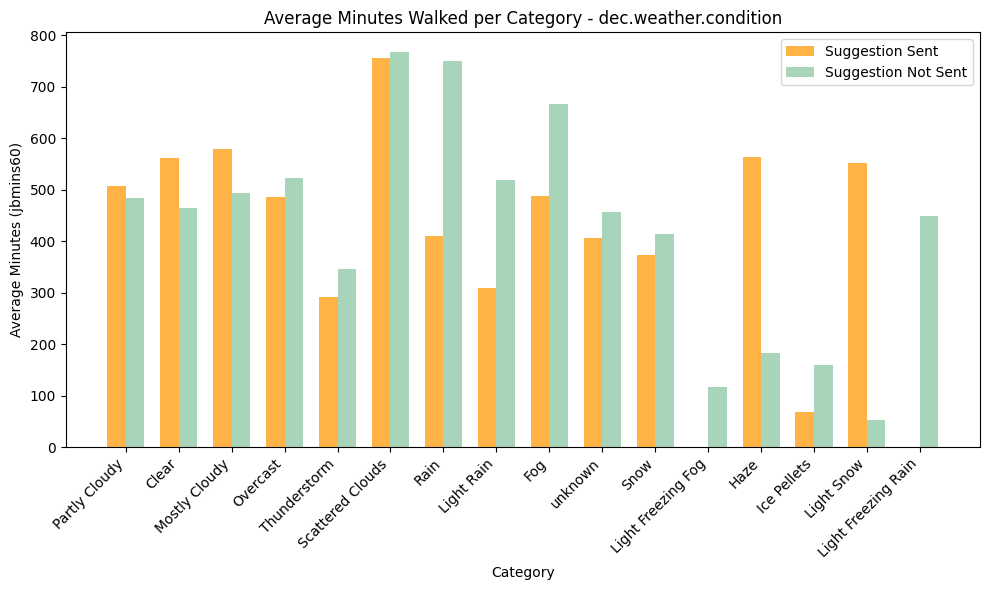

In [278]:
analyze_activity(column_name, weather_filter_fn, base_cat, sent_df, unsent_df)


In [270]:
unsent_df['dec.weather.condition'].unique()

array(['Mostly Cloudy', 'Clear', 'Partly Cloudy', nan, 'Overcast',
       'Thunderstorm', 'Rain', 'Fog', 'Scattered Clouds', 'Light Rain',
       'unknown', 'Snow', 'Light Freezing Fog', 'Ice Pellets',
       'Light Snow', 'Haze', 'Light Freezing Rain'], dtype=object)

## Temperature

In [271]:
column_name = "dec.temperature"

def temp_filter(value):
    return value > -20

def categorize_temperature(temp):
    if pd.isna(temp):  # Handle NaN values if necessary
        return 'Unknown'
    
    # Define the bin width
    bin_width = 5
    
    # Determine the lower bound of the bin
    lower_bound = (temp // bin_width) * bin_width
    
    # Create the string label in the form "X-Y°C"
    label = f"{int(lower_bound)}-{int(lower_bound + bin_width - 1)}°C"
    
    return label


def order_temperature_categories(categories):
    # Regular expression to capture negative and positive numbers in the range
    def extract_lower_bound(cat):
        # Use regex to find the first number (including negative numbers)
        match = re.search(r'-?\d+', cat)
        if match:
            return int(match.group())
        return 0  # Default case if no number is found

    # Sort categories by the extracted lower bound of the range
    sorted_categories = sorted(categories, key=extract_lower_bound)
    return sorted_categories


[np.float64(624.8936170212766), np.float64(451.68888888888887), np.float64(364.4675767918089), np.float64(420.0923482849604), np.float64(505.2147766323024), np.float64(545.4064386317907), np.float64(490.8565310492505), np.float64(525.4314442413163), np.float64(668.2931034482758), np.float64(784.1304347826087), np.float64(701.5)] ['-15--11°C', '-10--6°C', '-5--1°C', '0-4°C', '5-9°C', '10-14°C', '15-19°C', '20-24°C', '25-29°C', '30-34°C', '35-39°C']


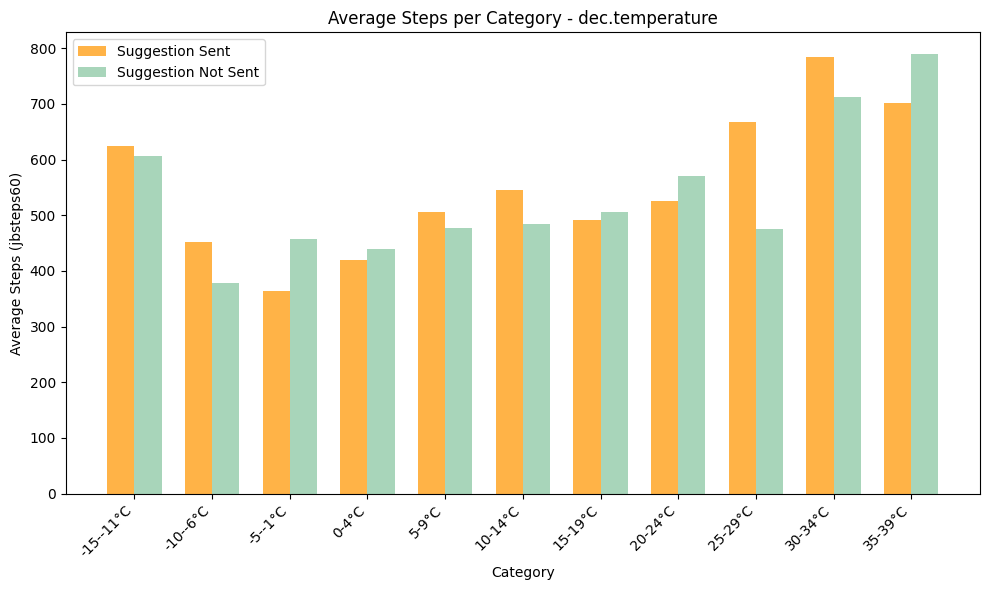

[np.float64(10.702127659574469), np.float64(8.777777777777779), np.float64(7.921501706484642), np.float64(8.691292875989445), np.float64(8.986254295532646), np.float64(9.680080482897385), np.float64(8.890792291220556), np.float64(9.563071297989032), np.float64(11.147783251231527), np.float64(12.706521739130435), np.float64(14.5)] ['-15--11°C', '-10--6°C', '-5--1°C', '0-4°C', '5-9°C', '10-14°C', '15-19°C', '20-24°C', '25-29°C', '30-34°C', '35-39°C']


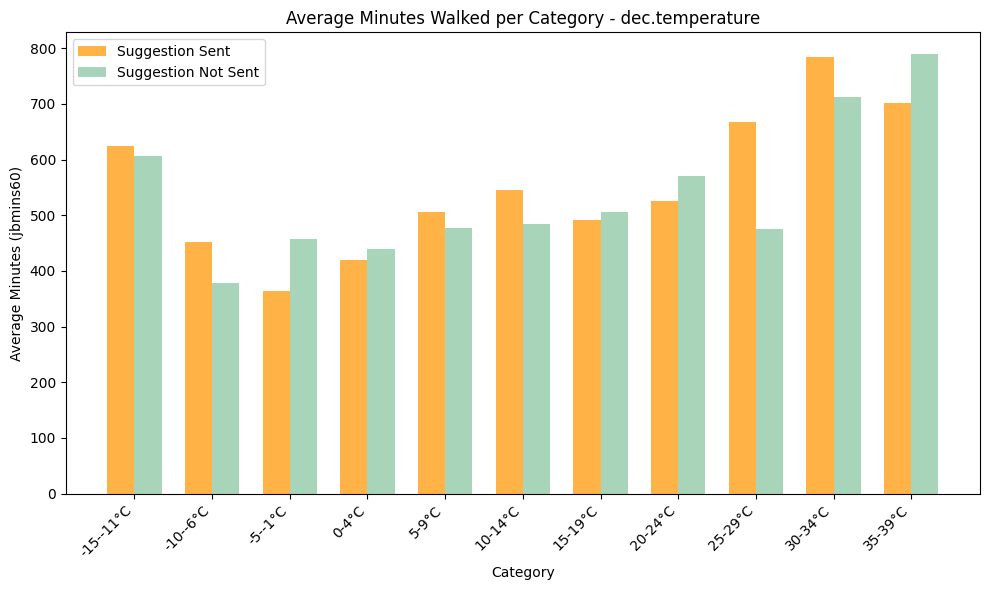

In [272]:
analyze_activity(column_name, temp_filter, categorize_temperature, sent_df, unsent_df, order_temperature_categories)


## Windspeed

In [273]:
column_name = "dec.windspeed"

def filter_windspeed(value):
    if value == "unknown":
        return False
    else:
        if float(value) < 0:
            return False
        else:
            return True


def categorize_windspeed(temp):

    
    # Define the bin width
    bin_width = 5
    
    # Determine the lower bound of the bin
    lower_bound = (float(temp) // bin_width) * bin_width
    
    # Create the string label in the form "X-Y°C"
    label = f"{int(lower_bound)}-{int(lower_bound + bin_width - 1)} mph"
    
    return label


def order_windspeed_categories(categories):
    # Regular expression to capture negative and positive numbers in the range
    def extract_lower_bound(cat):
        # Use regex to find the first number (including negative numbers)
        match = re.search(r'-?\d+', cat)
        if match:
            return int(match.group())
        return 0  # Default case if no number is found

    # Sort categories by the extracted lower bound of the range
    sorted_categories = sorted(categories, key=extract_lower_bound)
    return sorted_categories


[np.float64(500.26645890144135), np.float64(540.5245346869713), np.float64(680.9934640522875), np.float64(828.3617021276596), np.float64(297.2307692307692), np.float64(378.0), np.float64(217.2), np.float64(2486.0)] ['0-4 mph', '5-9 mph', '10-14 mph', '15-19 mph', '20-24 mph', '25-29 mph', '30-34 mph', '40-44 mph']


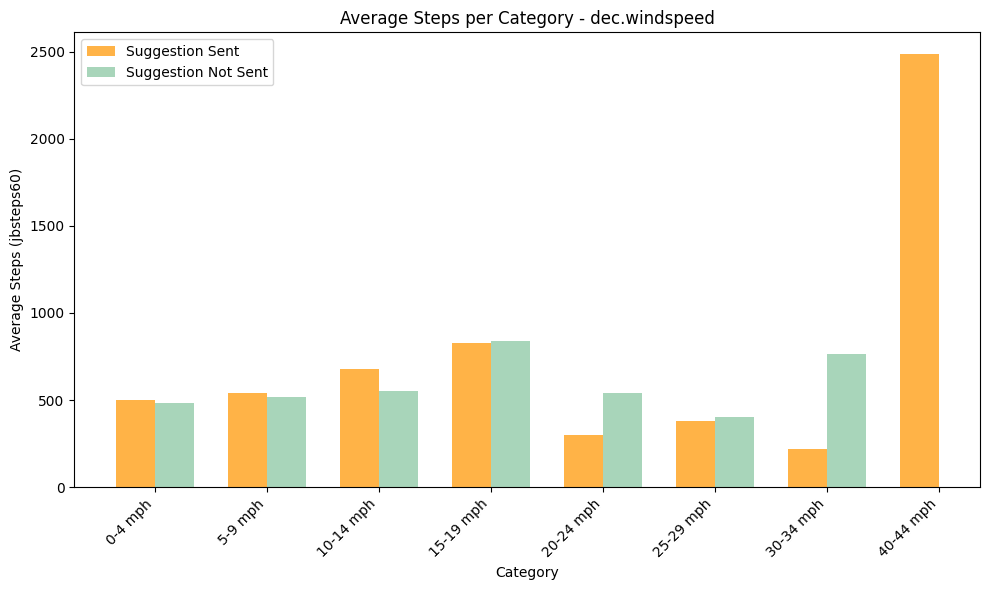

[np.float64(9.319049474094273), np.float64(9.38917089678511), np.float64(10.777777777777779), np.float64(13.0), np.float64(6.769230769230769), np.float64(10.0), np.float64(5.8), np.float64(30.0)] ['0-4 mph', '5-9 mph', '10-14 mph', '15-19 mph', '20-24 mph', '25-29 mph', '30-34 mph', '40-44 mph']


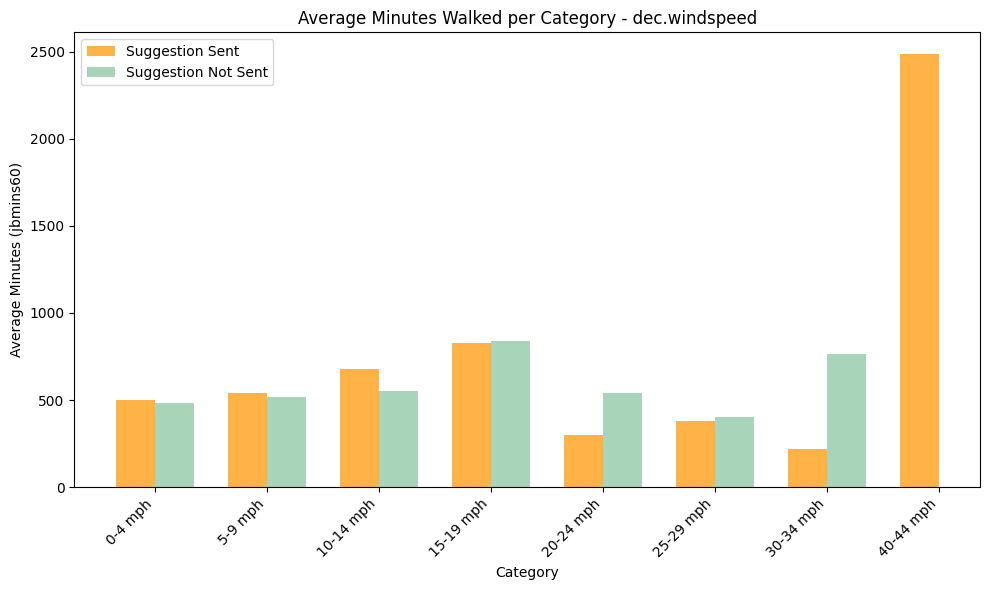

In [274]:
analyze_activity(column_name, filter_windspeed, categorize_windspeed, sent_df, unsent_df, order_windspeed_categories)


## Sendntary V Active

In [234]:
def merge_sed_act(value):
    return "Active" if value else "Sedentary"
sent_df["Type"] = sent_df["send.active"].apply(merge_sed_act)

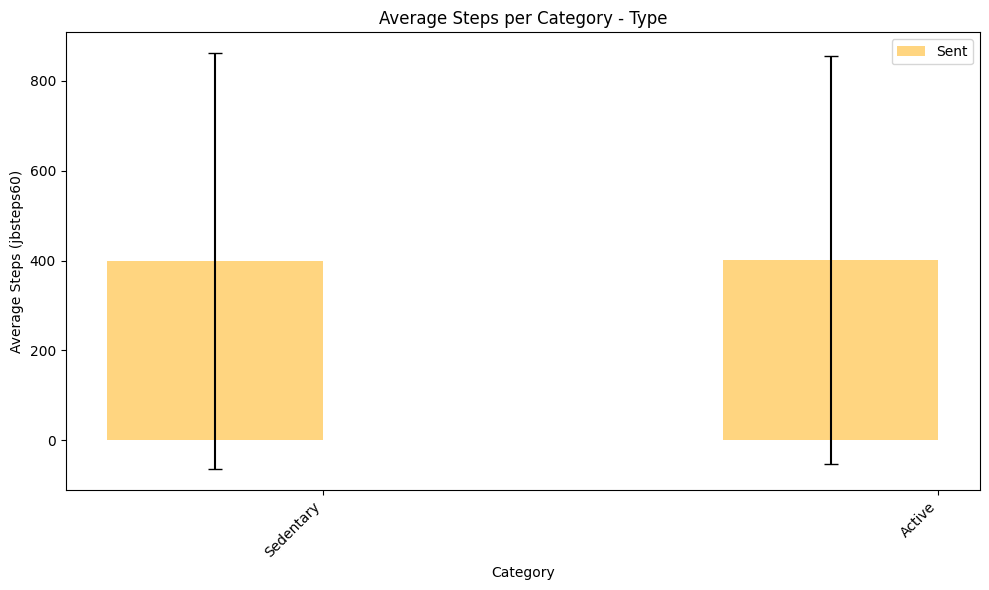

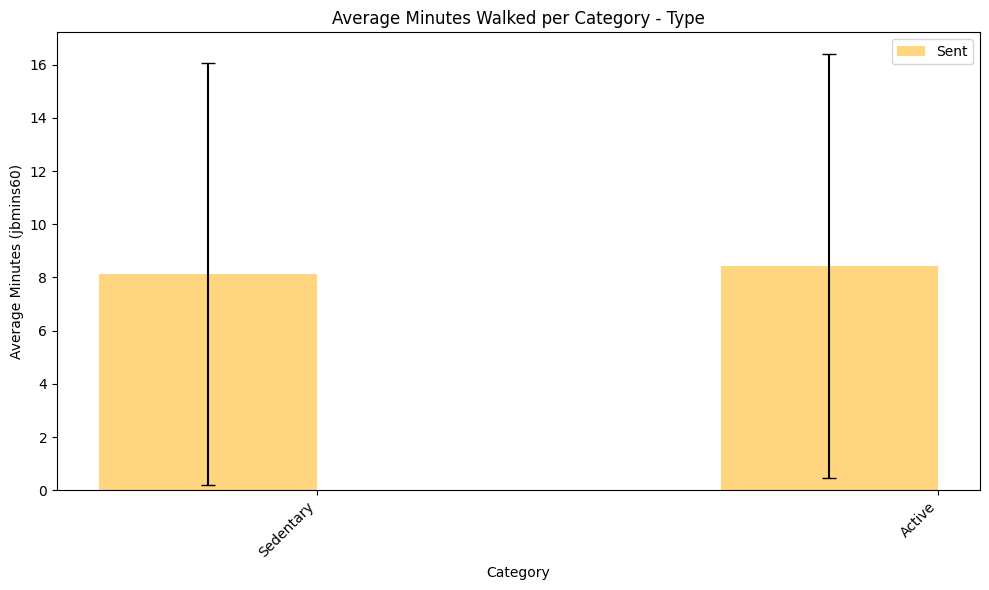

In [235]:
analyze_activity("Type", base_filter, base_cat, sent_df, unsent_df)
